This is a basic tool for graph (or network, we shall use the terms interchangeably) creation and traversal.

This tutorial MUST be read in conjunction with the official networkx documentation which is at: 
https://networkx.org/documentation/stable/auto_examples/basic/index.html


In [1]:
import networkx as nx
seed=1000           # seed the graph for reproducibility, you should be doing this  
G= nx.gnp_random_graph (10, .3, seed=seed )       # here we create a random binomial graph with 20 nodes and an average (expected) connectivity of 10*.3= 3.
print ( G.nodes() )

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [3]:
print(G.edges())

[(0, 3), (0, 8), (1, 4), (1, 6), (1, 8), (2, 8), (3, 8), (4, 5), (4, 6), (4, 7), (4, 9), (5, 7), (6, 7), (6, 8), (7, 9)]


In [4]:
import random
for (u, v) in G.edges():
    eweights=G.edges[u,v]['weight'] = random.randint(1,20)
    print(u,v,eweights)

0 3 7
0 8 3
1 4 18
1 6 19
1 8 7
2 8 15
3 8 12
4 5 4
4 6 12
4 7 1
4 9 18
5 7 13
6 7 6
6 8 17
7 9 14


node degree and node clustering
0 2 1.0
1 3 0.6666666666666666
2 1 0
3 2 1.0
4 5 0.4
5 2 1.0
6 4 0.5
7 4 0.5
8 5 0.2
9 2 1.0

the adjacency list
0 3 8
1 4 6 8
2 8
3 8
4 5 6 7 9
5 7
6 7 8
7 9
8
9
{(0, 3): 7, (0, 8): 3, (1, 4): 18, (1, 6): 19, (1, 8): 7, (2, 8): 15, (3, 8): 12, (4, 5): 4, (4, 6): 12, (4, 7): 1, (4, 9): 18, (5, 7): 13, (6, 7): 6, (6, 8): 17, (7, 9): 14}


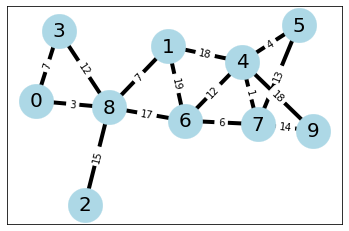

In [5]:
import matplotlib.pyplot as plt

# some properties
print("node degree and node clustering")
for v in nx.nodes(G):
    print(f"{v} {nx.degree(G, v)} {nx.clustering(G, v)}")

print()
print("the adjacency list")
for line in nx.generate_adjlist(G):
    print(line)

links = [(u, v) for (u, v, d) in G.edges(data=True)]
pos = nx.nx_pydot.graphviz_layout(G) 
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color='lightblue', linewidths=0.25) # draw nodes
nx.draw_networkx_edges(G, pos, edgelist=links, width=4)                                 # draw edges

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels

edge_labels = nx.get_edge_attributes(G, "weight")
print(edge_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.show()


In [6]:
nx.shortest_path(G,2,4,weight='weight',method='dijkstra')     # find the shortest path between two nodes using Dijkstra's algorithm; in this case between two nodes                                                      

[2, 8, 6, 7, 4]

Q1) Find the length of the shortest path using Dijisktra's algorithm.

In [16]:
nx.dijkstra_path_length(G, source=2, target=4, weight='weight')

39

Q2) Make use of the A* algorithm to find the shortest path

In [17]:
nx.astar_path(G, source=2, target=4, heuristic=None, weight='weight')

[2, 8, 6, 7, 4]

Q3) Find the length of the shortest path using the A* algorithm.

In [18]:
nx.astar_path_length(G, source=2, target=4, heuristic=None, weight='weight')

39